<a href="https://colab.research.google.com/github/IloCoder/ML_Projects/blob/main/ML_20_21_(Clustering_Analysis_Customers_Segmentation)_EN_blank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from customer of a food delivery company.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will specify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

***Features:***
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- ***Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise***
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- The First Look

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering with numeric features

    * Create a new dataset with numeric features
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Clustering based on selected features

    * Create a new dataset with variables of your choice*
    
    * Determine optimal number of clusters*
    
    * Apply K Means*
    
    * Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering with selected features

    * Determine optimal number of clusters using Dendogram*

    * Apply Agglomerative Clustering*

    * Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

### Import Libraries

In [109]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.metrics import silhouette_score

#from ipywidgets import interact
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = (
    lambda x: "{:.0f}".format(x) if int(x) == x else "{:,.2f}".format(x)
)

### Load Dataset

In [110]:
from typing import ParamSpec
df = pd.read_csv("/content/marketing_campaign.csv", delimiter=";", parse_dates=["Dt_Customer"])

In [111]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [112]:
df.shape

(2240, 29)

### The First Look
- Since we will do clustering analysis, we will remove Response variable from dataset.
- You can rename columns to more usable, if you need.

In [113]:
df.drop("Response", axis="columns", inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [115]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [116]:
df.columns = [col.lower() for col in df.columns]
df.columns

for col in df.columns:
    print(df[col].nunique())

2240
59
5
8
1974
3
3
663
100
776
158
558
182
177
213
15
15
14
14
16
2
2
2
2
2
2
1
1


In [117]:
df.id.is_unique

True

In [118]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,2240,"5,592.16",0,"2,828.25","5,458.50","8,427.75",11191,"3,246.66"
year_birth,2240,"1,968.81",1893,1959,1970,1977,1996,11.98
income,2216,"52,247.25",1730,35303,"51,381.50",68522,666666,"25,173.08"
kidhome,2240,0.44,0,0,0,1,2,0.54
teenhome,2240,0.51,0,0,0,1,2,0.54
dt_customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
recency,2240,49.11,0,24,49,74,99,28.96
mntwines,2240,303.94,0,23.75,173.50,504.25,1493,336.60
mntfruits,2240,26.30,0,1,8,33,199,39.77
mntmeatproducts,2240,166.95,0,16,67,232,1725,225.72


In [120]:
df.describe(include="object").T

,count,unique,top,freq
education,2240,5,Graduation,1127
marital_status,2240,8,Married,864


In [121]:
df[df.income >= 666666]

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue
2233,9432,1977,Graduation,Together,666666,1,0,2013-06-02,23,9,...,3,6,0,0,0,0,0,0,3,11


In [122]:
df.drop(index=2233, inplace=True)

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.

In [123]:
df.groupby(["education", "marital_status"])["income"].median()

education   marital_status
2n Cycle    Divorced             49118
            Married          46,462.50
            Single           48,668.50
            Together             45774
            Widow                47682
Basic       Divorced              9548
            Married              22352
            Single               16383
            Together             23179
            Widow                22123
Graduation  Absurd               79244
            Alone                34176
            Divorced             55635
            Married              50737
            Single           49,973.50
            Together             53977
            Widow                58275
Master      Absurd               65487
            Alone                61331
            Divorced             49476
            Married          53,088.50
            Single               49494
            Together             49736
            Widow                51529
PhD         Alone                35860
            Divorced         50,613.50
            Married          57,081.50
            Single               50198
            Together             56756
            Widow                57032
            YOLO                 48432
Name: income, dtype: float64

In [124]:
df["income"].fillna(df.groupby(["education", "marital_status"])["income"].transform("median"), inplace=True)

In [125]:
df.dt_customer.max()

Timestamp('2014-06-29 00:00:00')

In [126]:
df["tenure"] = (df.dt_customer.max() - df.dt_customer).dt.days
df.tenure

,tenure
0,663
1,113
2,312
3,139
4,161
...,...
2235,381
2236,19
2237,155
2238,156


In [127]:
df.tenure.describe()

,tenure
count,2239
mean,353.56
std,202.17
min,0
25%,180.50
50%,355
75%,529
max,699


In [128]:
df["age"] = 2014 - df.year_birth

In [129]:
df.age.describe()

,age
count,2239
mean,45.20
std,11.99
min,18
25%,37
50%,44
75%,55
max,121


In [130]:
df.marital_status.value_counts()

,count
marital_status,
Married,864
Together,579
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [131]:
marital_status_map = {
    "Single": "single",
    "Married": "married",
    "Together": "together",
    "Divorced": "divorced",
    "Widow": "widowed",
    "alone": "single",
    "Absurd": "single",
    "YOLO": "single",
}
df["marital_status"] = df.marital_status.transform(lambda x: x.map(marital_status_map))

In [132]:
df.drop(
    ["dt_customer", "year_birth", "z_costcontact", "z_revenue"],
    axis="columns",
    inplace=True,
)

In [134]:
not_binary = [
    col for col in df.columns if df[col].nunique() > 2 and not df[col].is_unique
]
not_binary

['education',
 'marital_status',
 'income',
 'kidhome',
 'teenhome',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'tenure',
 'age']

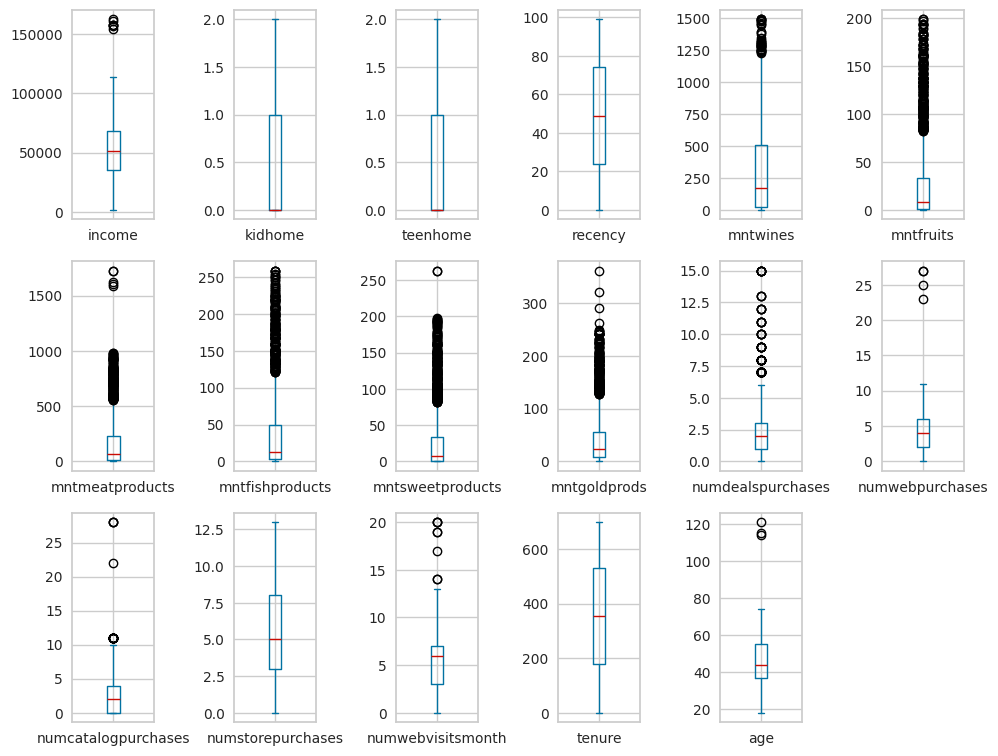

In [135]:
df[not_binary].plot(kind="box", subplots=True, layout=(4, 6), figsize=(10, 10))
plt.tight_layout()

### PCA
- We have too many features for bivariate analysis and pairplot. So we will create 3 components to have insight how our data distrubuted.

In [136]:
df_pca = df[not_binary].iloc[:, 2:].copy()
df_pca

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,tenure,age
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663,57
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113,60
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312,49
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139,30
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,381,47
2236,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,19,68
2237,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,155,33
2238,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,156,58


In [137]:
scaler = StandardScaler().set_output(transform="pandas")
pca = PCA(n_components=3).set_output(transform="pandas")

In [138]:
df_pca = scaler.fit_transform(df_pca)
df_pca

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,tenure,age
0,0.29,-0.82,-0.93,0.31,0.98,1.55,1.68,2.46,1.48,0.84,0.35,1.41,2.51,-0.55,0.69,1.53,0.98
1,-0.26,1.03,0.91,-0.38,-0.87,-0.64,-0.71,-0.65,-0.63,-0.73,-0.17,-1.11,-0.57,-1.17,-0.13,-1.19,1.24
2,0.92,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,-0.69,1.41,-0.23,1.29,-0.54,-0.21,0.32
3,-1.18,1.03,-0.93,-0.80,-0.87,-0.56,-0.65,-0.50,-0.58,-0.75,-0.17,-0.75,-0.91,-0.55,0.28,-1.06,-1.27
4,0.30,1.03,-0.93,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.39,0.33,0.12,0.06,-0.13,-0.95,-1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.43,-0.82,0.91,-0.11,1.20,0.42,0.07,0.08,2.20,3.89,-0.17,1.77,0.12,-0.55,-0.13,0.14,0.15
2236,0.56,2.89,0.91,0.24,0.30,-0.66,-0.61,-0.69,-0.66,-0.69,2.42,1.41,-0.23,-0.24,0.69,-1.66,1.90
2237,0.23,-0.82,-0.93,1.45,1.79,0.55,0.22,-0.10,-0.37,-0.38,-0.69,-0.75,0.12,2.22,0.28,-0.98,-1.02
2238,0.81,-0.82,0.91,-1.42,0.37,0.09,0.21,0.78,0.07,0.33,-0.17,0.69,0.80,1.29,-0.95,-0.98,1.07


In [139]:
pca_comps = pca.fit_transform(df_pca)
pca_comps

,pca0,pca1,pca2
0,3.85,0.55,-1.97
1,-2.32,-0.29,1.94
2,1.94,-0.31,0.20
3,-2.57,-1.51,-0.49
4,-0.29,-0.38,-0.76
...,...,...,...
2235,2.69,1.43,-0.63
2236,-1.53,2.58,1.29
2237,1.29,-0.92,0.06
2238,2.06,0.53,1.79


In [140]:
pca.explained_variance_ratio_.cumsum()

array([0.36757904, 0.48685522, 0.57122208])

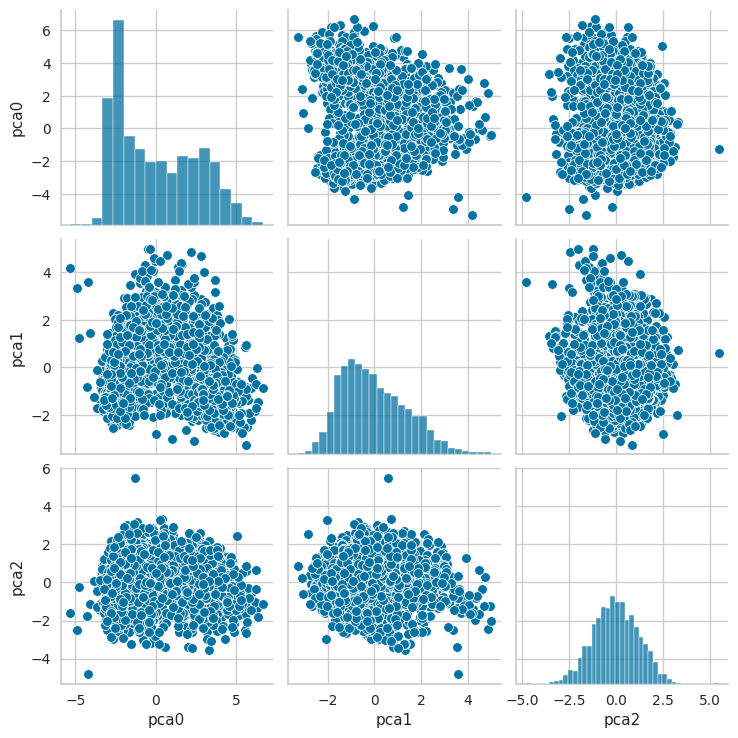

In [141]:
sns.pairplot(pca_comps)

In [142]:
print(pca_comps.shape)

(2239, 3)


In [143]:
pca_comps

,pca0,pca1,pca2
0,3.85,0.55,-1.97
1,-2.32,-0.29,1.94
2,1.94,-0.31,0.20
3,-2.57,-1.51,-0.49
4,-0.29,-0.38,-0.76
...,...,...,...
2235,2.69,1.43,-0.63
2236,-1.53,2.58,1.29
2237,1.29,-0.92,0.06
2238,2.06,0.53,1.79


In [145]:
color = np.argmax(np.array(pca_comps), axis=1)
color

array([0, 2, 0, ..., 0, 0, 1])

In [146]:
pca_comps["label"] = color

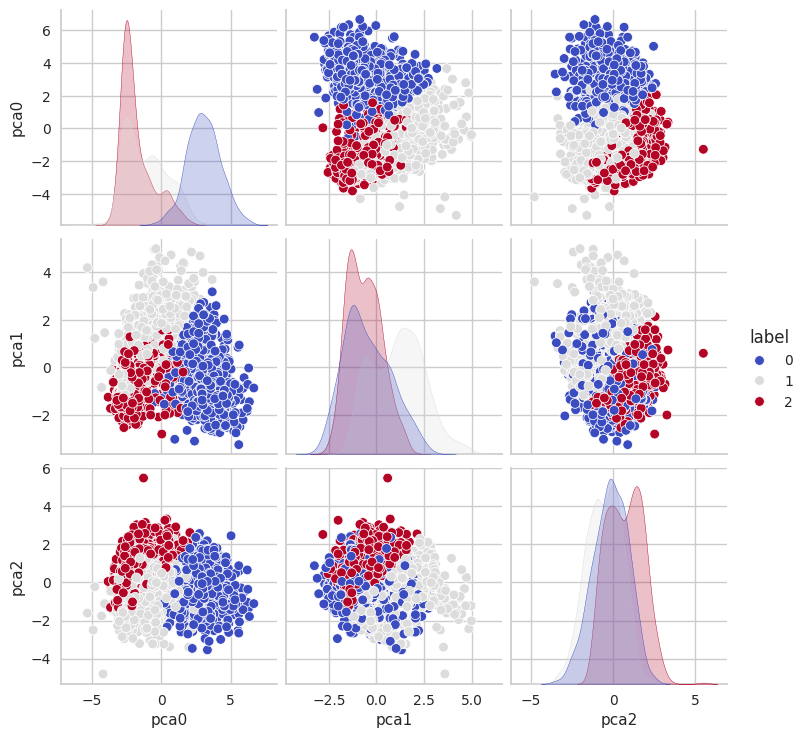

In [147]:
sns.pairplot(pca_comps, hue="label", palette="coolwarm")

In [148]:
fig = px.scatter_3d(pca_comps, x="pca0", y="pca1", z="pca2", color=color)

fig.update_layout(scene=dict(xaxis_title="1", yaxis_title="2", zaxis_title="3"))
fig.show()

# 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.

The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of purchases and Income
- **Spender Customers** --  Income is less but purcheses high, so can also be treated as potential target customer.

## K-means Clsutering

### Create a new dataset with numeric features

In [149]:
df1 = df[not_binary].iloc[:, 2:].copy()

In [150]:
scaler1 = RobustScaler().set_output(transform="pandas")

In [ ]:
cluster_df = scaler1.fit_transform(df1)

In [151]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform


def hopkins(X, ratio=0.05):
    """
    Compute the Hopkins statistic for the given dataframe X.
    Hopkins statistic is a measure of the randomness of a data set.
    It is calculated as the ratio of the sum of the distances to the nearest neighbors
    of the uniform random sample to the sum of the distances to the nearest neighbors of
    the original data sample.
    The value of the Hopkins statistic is between 0 and 1, with a value of 0 indicating
    that the data is not random and a value of 1 indicating that the data is completely random.
    The Hopkins statistic is a good measure of the randomness of a data set,
    as it can be used to determine if a data set is random or not.

    Parameters:
    X (pandas.DataFrame): Input dataframe
    ratio (float, optional): Ratio of the uniform random sample to the original data sample. Defaults to 0.05.

    Returns:
    float: Hopkins statistic
    """

    if not isinstance(X, np.ndarray):
        X = X.values  # convert dataframe to a numpy array
    sample_size = int(
        X.shape[0] * ratio
    )  # 0.05 (5%) based on paper by Lawson and Jures

    # a uniform random sample in the original data space
    X_uniform_random_sample = uniform(
        X.min(axis=0), X.max(axis=0), (sample_size, X.shape[1])
    )

    # a random sample of size sample_size from the original data X
    random_indices = sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    # initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X)

    # u_distances = nearest neighbour distances from uniform random sample
    u_distances, u_indices = nbrs.kneighbors(X_uniform_random_sample, n_neighbors=2)
    u_distances = u_distances[:, 0]  # distance to the first (nearest) neighbour

    # w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances, w_indices = nbrs.kneighbors(X_sample, n_neighbors=2)
    # distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[:, 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    # compute and return hopkins' statistic
    H = u_sum / (u_sum + w_sum)
    return H

In [152]:
result = []
for _ in range(10):
    result.append(hopkins(cluster_df, 0.05))

np.mean(result)

np.float64(0.858969208414784)

#### Determine optimal number of clusters

### inertia

In [153]:
def elbow_vis(X, k_range=range(2, 11), inertia=True):
    """
    This is a function that visualizes the elbow method for determining the optimal number of clusters in a dataset.

    Args:
        X (pd.Dataframe): Input data
        k_range (range, optional): generator for k values. Defaults to range(2, 11).
        inertia (bool, optional): to select either inertia or distorion. Defaults to True.
    Returns:
        None.
    """
    if inertia:
        inertias = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X)
            inertias.append(kmeanModel.inertia_)
        plt.figure(figsize=(10, 6))
        plt.plot(k_range, inertias, "bo--")
        plt.xlabel("k")
        plt.ylabel("Inertia")
        plt.title("The Elbow Method showing the optimal k")
        plt.show()
    else:
        distortion = []
        for k in k_range:
            kmeanModel = KMeans(n_clusters=k, random_state=42)
            kmeanModel.fit(X)
            distances = kmeanModel.transform(
                X
            )  # distances from each observation to each cluster centroid
            labels = kmeanModel.labels_
            result = []
            for i in range(k):
                cluster_distances = distances[
                    labels == i, i
                ]  # distances from observations in each cluster to their own centroid
                result.append(
                    np.mean(cluster_distances**2)
                )  # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
            distortion.append(
                sum(result)
            )  # sum the means of all clusters and add it to the distortion list

        plt.figure(figsize=(10, 6))
        plt.plot(k_range, distortion, "r*--", markersize=14.0)
        plt.xlabel("Different k values")
        plt.ylabel("Distortion")
        plt.title("elbow method")

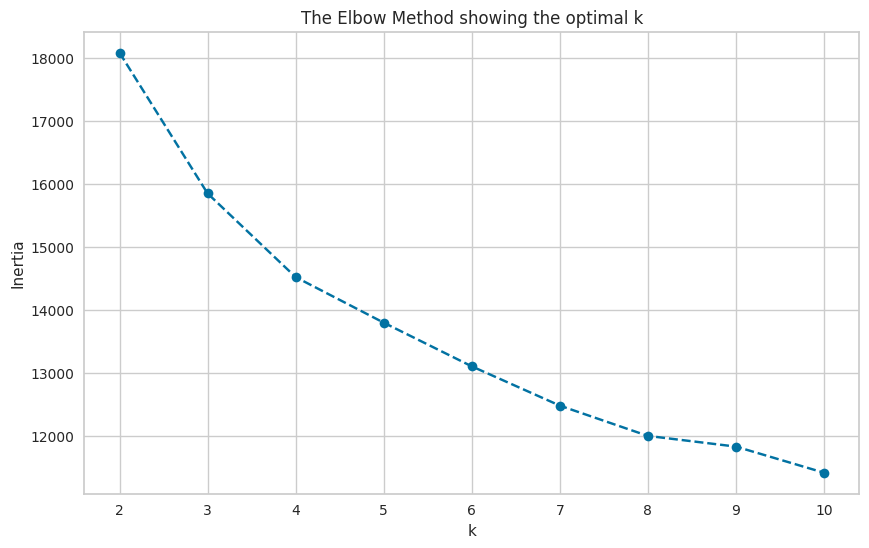

In [154]:
elbow_vis(cluster_df)

### distortion

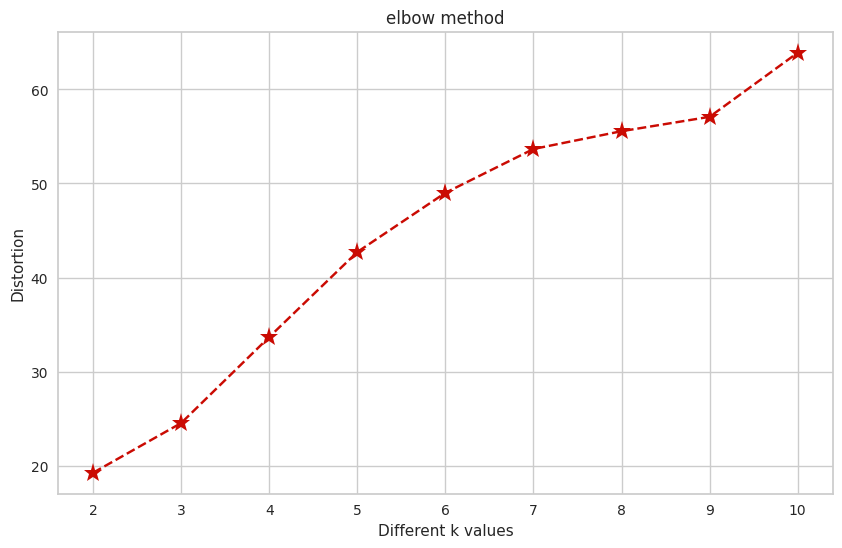

In [155]:
elbow_vis(cluster_df, inertia=False)

### silhoutte score

In [156]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(cluster_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.37125595074214074
For n_clusters=3, the silhouette score is 0.23638715623979037
For n_clusters=4, the silhouette score is 0.2281023605853736
For n_clusters=5, the silhouette score is 0.22994882149119694
For n_clusters=6, the silhouette score is 0.22215387576209036
For n_clusters=7, the silhouette score is 0.22139710439251162
For n_clusters=8, the silhouette score is 0.1317791189441009
For n_clusters=9, the silhouette score is 0.10381347178948319
For n_clusters=10, the silhouette score is 0.10645595225380963


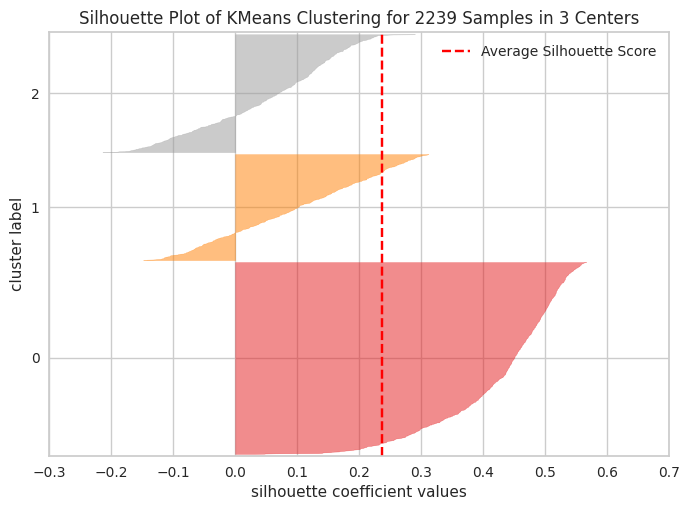

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2239 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [157]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(cluster_df)  # Fit the data to the visualizer
visualizer.poof()

In [158]:
model3.n_clusters

3

In [159]:
for i in range(model3.n_clusters):
    label = model3.labels_ == i
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.42623495261150757
mean silhouette score for label 1    : 0.09790291266586475
mean silhouette score for label 2    : 0.052074919119676405
mean silhouette score for all labels : 0.23638715623979037


#### Apply K Means

In [160]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [161]:
kmeans.fit_predict(cluster_df)

array([1, 0, 2, ..., 2, 2, 0], dtype=int32)

#### Visualizing and Labeling All the Clusters

In [162]:
fig = px.scatter_3d(pca_comps, x="pca0", y="pca1", z="pca2", color=kmeans.labels_)

# Customize the plot
fig.update_layout(scene=dict(xaxis_title="1", yaxis_title="2", zaxis_title="3"))
fig.show()

In [163]:
df1["kmeans_labels"] = kmeans.labels_

### Clustering based on selected features

#### Select features from existing data

In [165]:
df1

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,tenure,age,kmeans_labels
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,663,57,1
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,113,60,0
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,312,49,2
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,139,30,0
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,161,33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,381,47,1
2236,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,19,68,2
2237,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,155,33,2
2238,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,156,58,2


In [166]:
clus_pred = df1.groupby("kmeans_labels").mean().T
clus_pred

kmeans_labels,0,1,2
income,"35,211.44","74,616.27","58,824.25"
kidhome,0.77,0.05,0.26
teenhome,0.46,0.25,0.82
recency,49.27,50.31,47.80
mntwines,43.21,574.28,485.43
mntfruits,4.51,73.94,18.94
mntmeatproducts,22.12,448.56,149.57
mntfishproducts,6.28,105.42,27.34
mntsweetproducts,4.74,77.30,18.25
mntgoldprods,13.91,82.64,58.33


In [167]:
clus_pred_scaled = MinMaxScaler().set_output(transform="pandas").fit_transform(clus_pred.T).T

In [168]:
fig = px.line(data_frame=clus_pred_scaled)
fig.show(renderer="vscode")

In [169]:
df1.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'tenure', 'age', 'kmeans_labels'],
      dtype='object')

In [170]:
selected_features = [
    "income",
    "mntwines",
    "mntmeatproducts",
    "numcatalogpurchases",
    "mntgoldprods",
    "age",
]


df_selected = df1[selected_features]

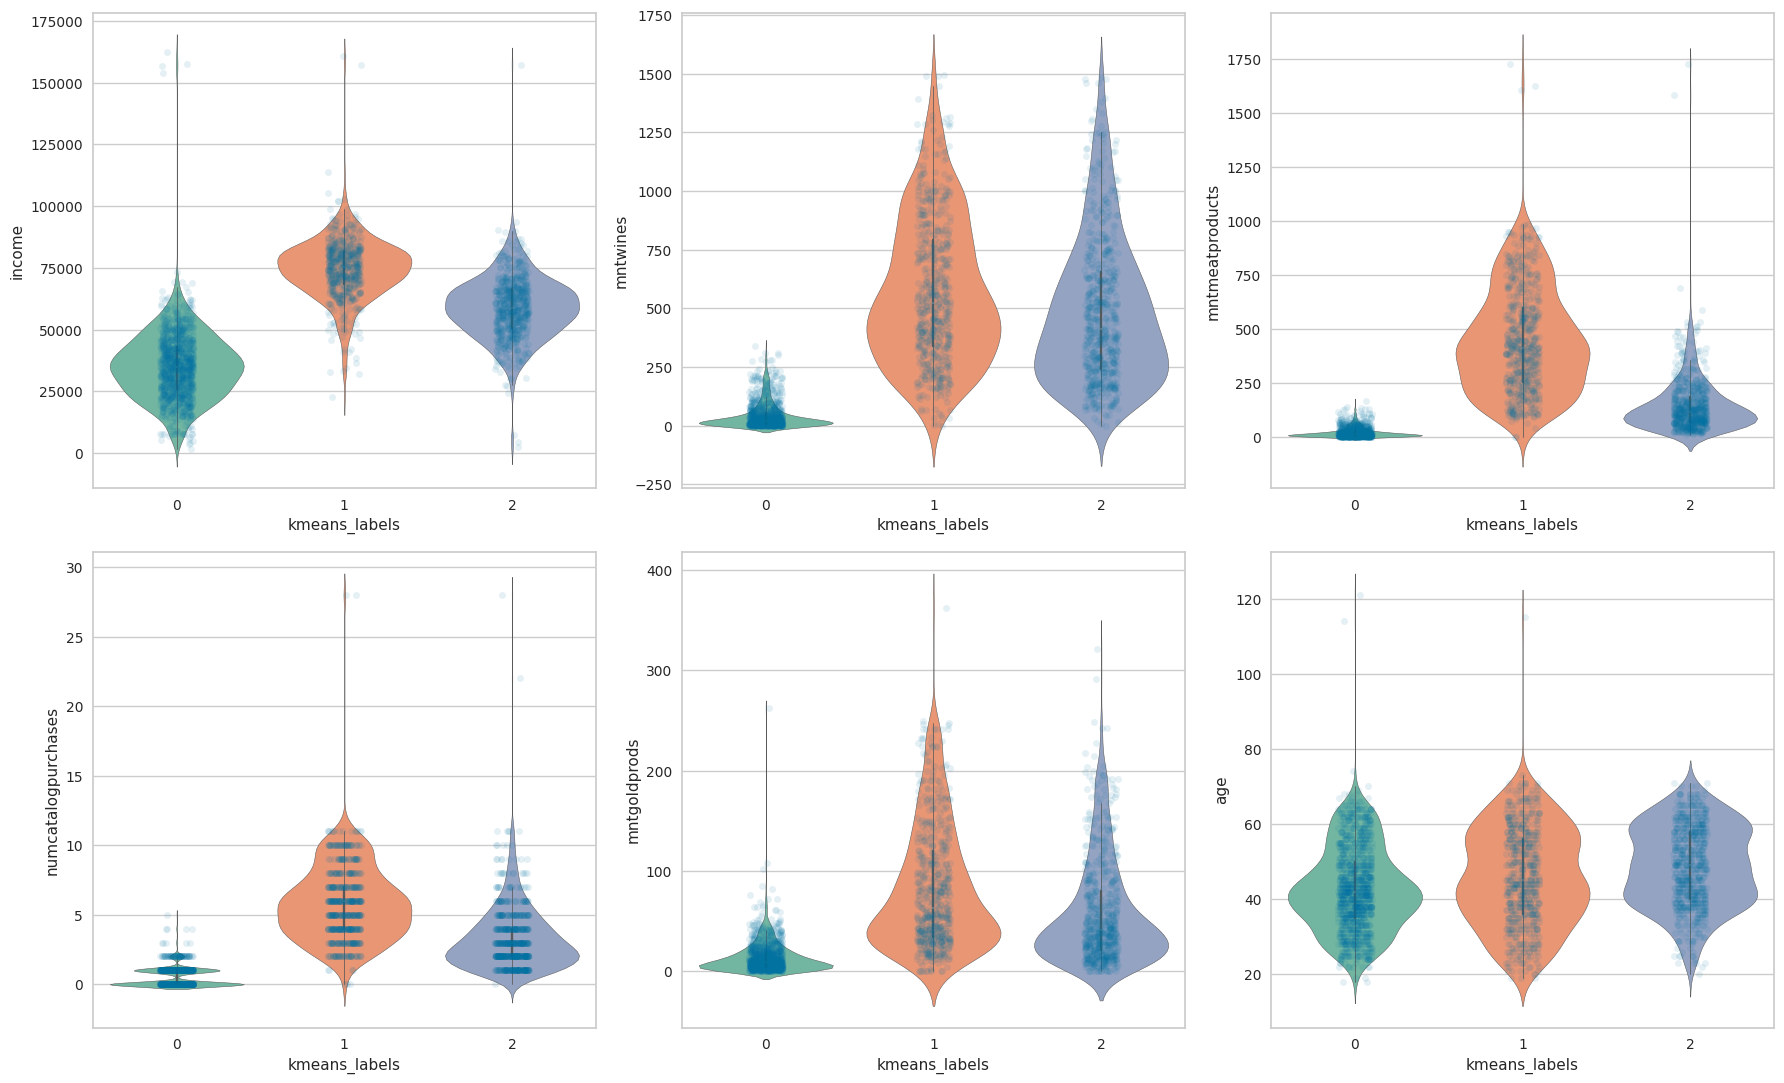

In [171]:
plt.figure(figsize=(18, 11))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.stripplot(
        y=feature,
        x=df1["kmeans_labels"],
        data=df_selected,
        jitter=True,
        edgecolor="gray",
        alpha=0.1,
    )
    sns.violinplot(y=feature, x=df1["kmeans_labels"], data=df_selected, palette="Set2")

plt.tight_layout()

In [172]:
df_selected.income.nlargest(2)

,income
617,162397
687,160803


In [173]:
df_selected.income.describe()

,income
count,2239
mean,"51,957.44"
std,"21,412.83"
min,1730
25%,"35,533.50"
50%,51195
75%,"68,277.50"
max,162397


In [174]:
def income_binner(x):
    if x < 35533:
        return 0
    elif x < 68277:
        return 1
    else:
        return 2

df_selected["income"] = df_selected["income"].apply(income_binner)

#### Determine optimal number of clusters for selected features

In [175]:
df_selected = scaler1.fit_transform(df_selected)

In [176]:
result = []
for _ in range(10):
    result.append(hopkins(df_selected, 0.05))

np.mean(result)

np.float64(0.9254386160995516)

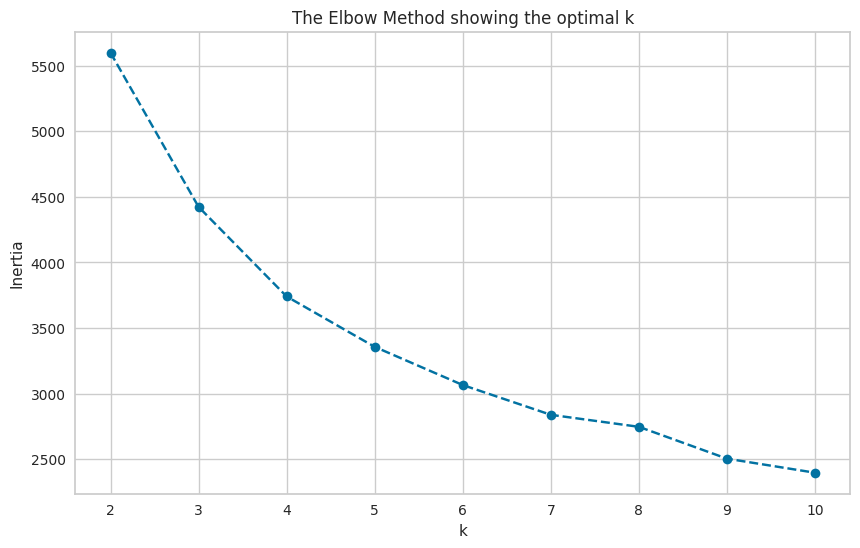

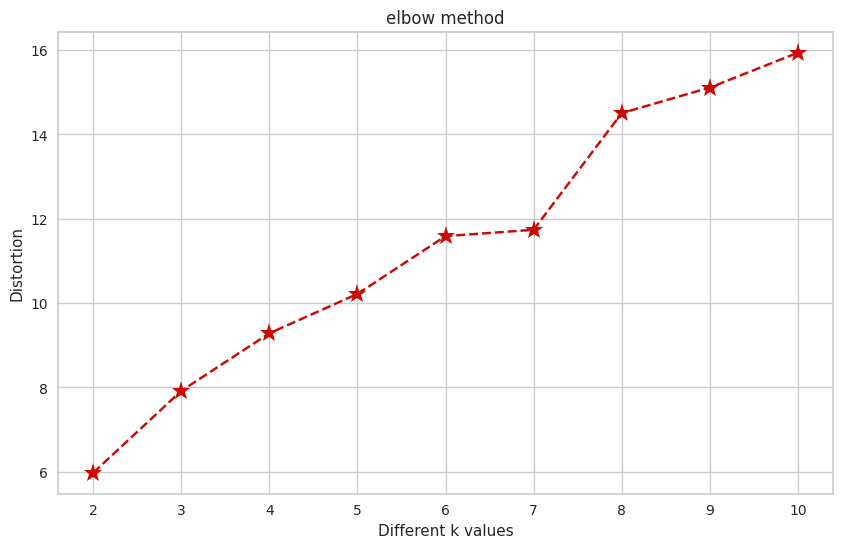

In [177]:
elbow_vis(df_selected)
elbow_vis(df_selected, inertia=False)

In [178]:
range_n_clusters = range(2, 9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_selected)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.428269339401022
For n_clusters=3, the silhouette score is 0.4342649871163598
For n_clusters=4, the silhouette score is 0.3261252917710713
For n_clusters=5, the silhouette score is 0.25108365292701457
For n_clusters=6, the silhouette score is 0.25341358128959734
For n_clusters=7, the silhouette score is 0.2697694179021776
For n_clusters=8, the silhouette score is 0.25012810538865915


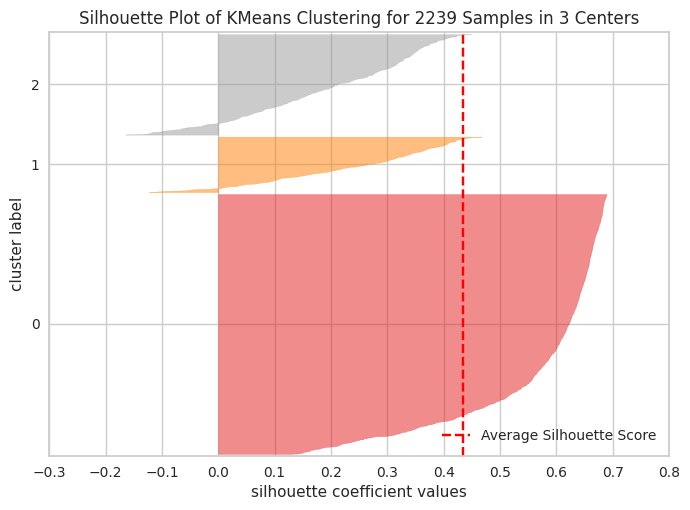

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2239 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [179]:
model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df_selected)
visualizer.poof()

In [180]:
for i in range(model3.n_clusters):
    label = model3.labels_ == i
    print(
        f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5685228089317392
mean silhouette score for label 1    : 0.23558078954468153
mean silhouette score for label 2    : 0.19688953860289626
mean silhouette score for all labels : 0.4342649871163598


#### Building the model based on the optimal number of clusters with selected features

In [181]:
final_model = KMeans(n_clusters=3, random_state=42)
final_model.fit_predict(df_selected)

array([2, 0, 0, ..., 2, 2, 0], dtype=int32)

**K-Means Clustering by Education**

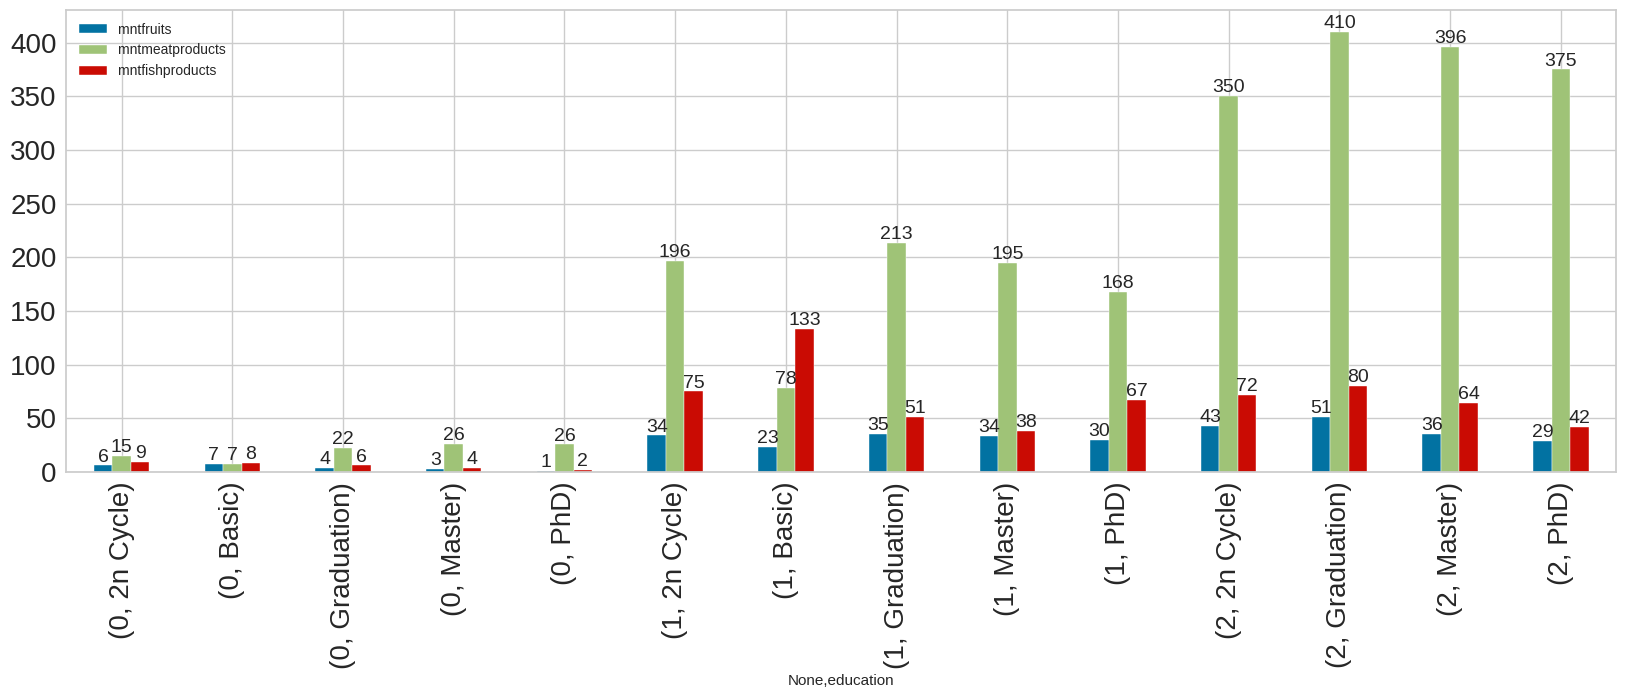

In [ ]:
ax = (
    df[["education"]]
    .join(df.iloc[:, 8:11])
    .groupby([ final_model.labels_,"education"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

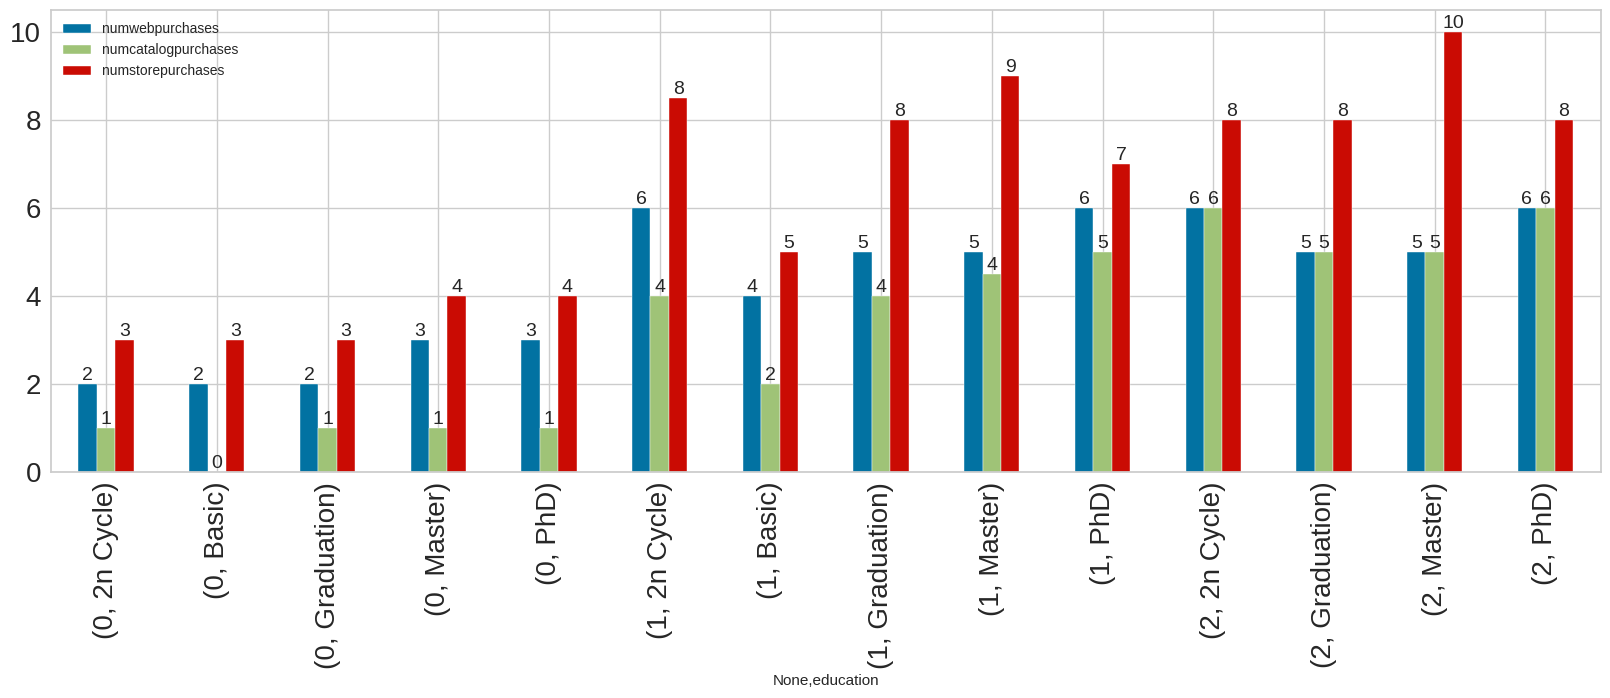

In [ ]:
ax = (
    df[["education"]]
    .join(df1.iloc[:, 11:14])
    .groupby([ final_model.labels_,"education"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

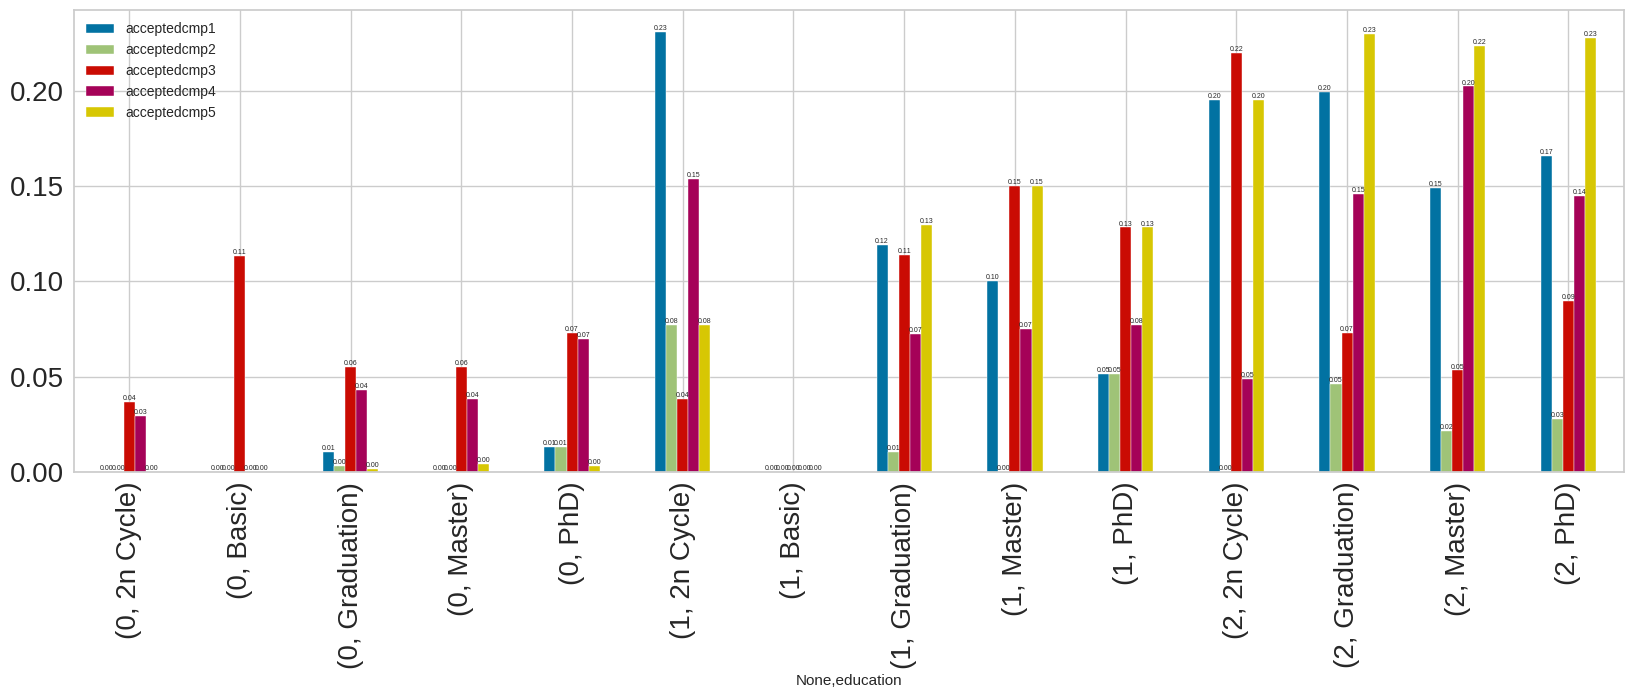

In [ ]:
ax = (
    df[
        [
            "education",
            "acceptedcmp1",
            "acceptedcmp2",
            "acceptedcmp3",
            "acceptedcmp4",
            "acceptedcmp5",
        ]
    ]
    .groupby([final_model.labels_,"education", ])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.2f", size=5)

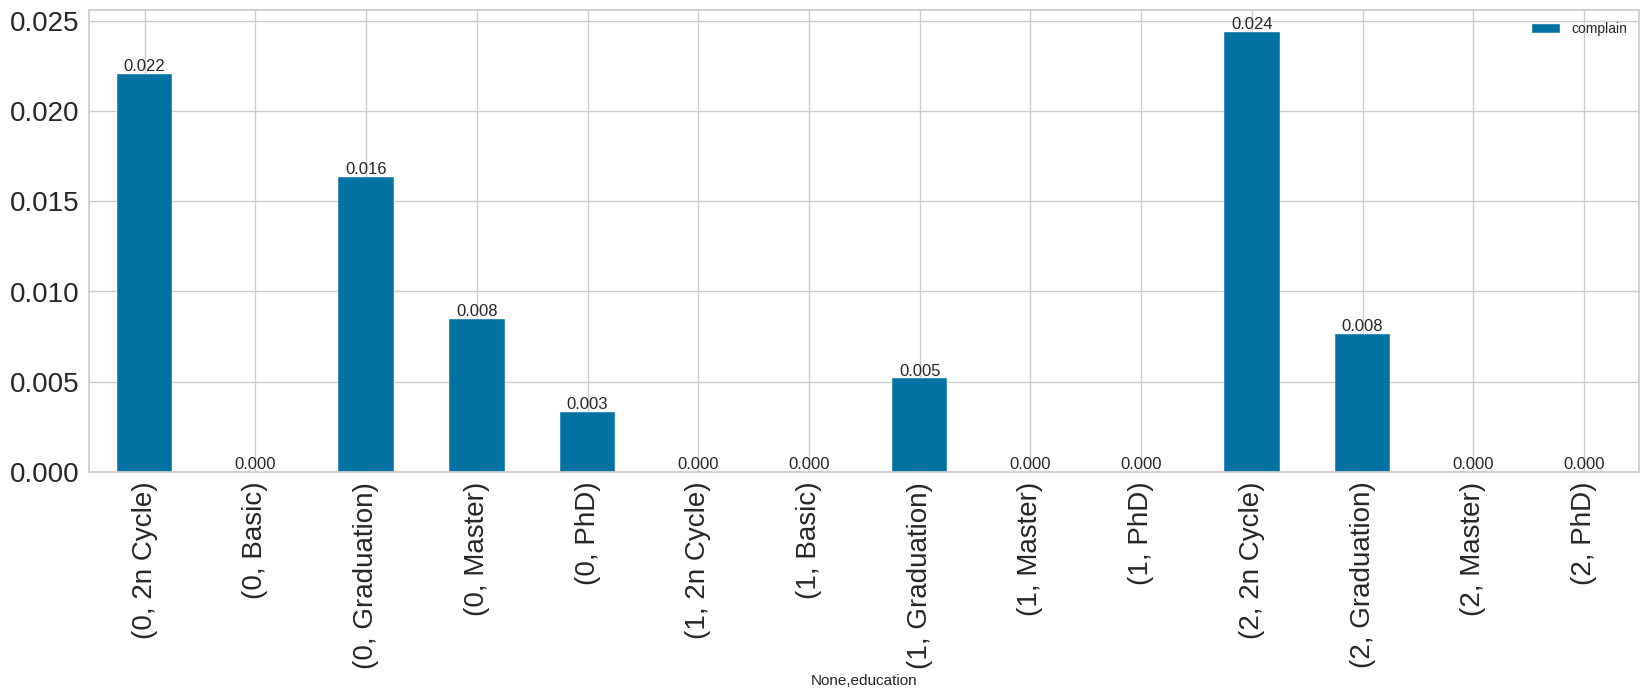

In [ ]:
ax = (
    df[
        [
            "education",
            "complain",
        ]
    ]
    .groupby([final_model.labels_,"education", ])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.3f", size=12)

**K-Means Clustering for Marital Status**

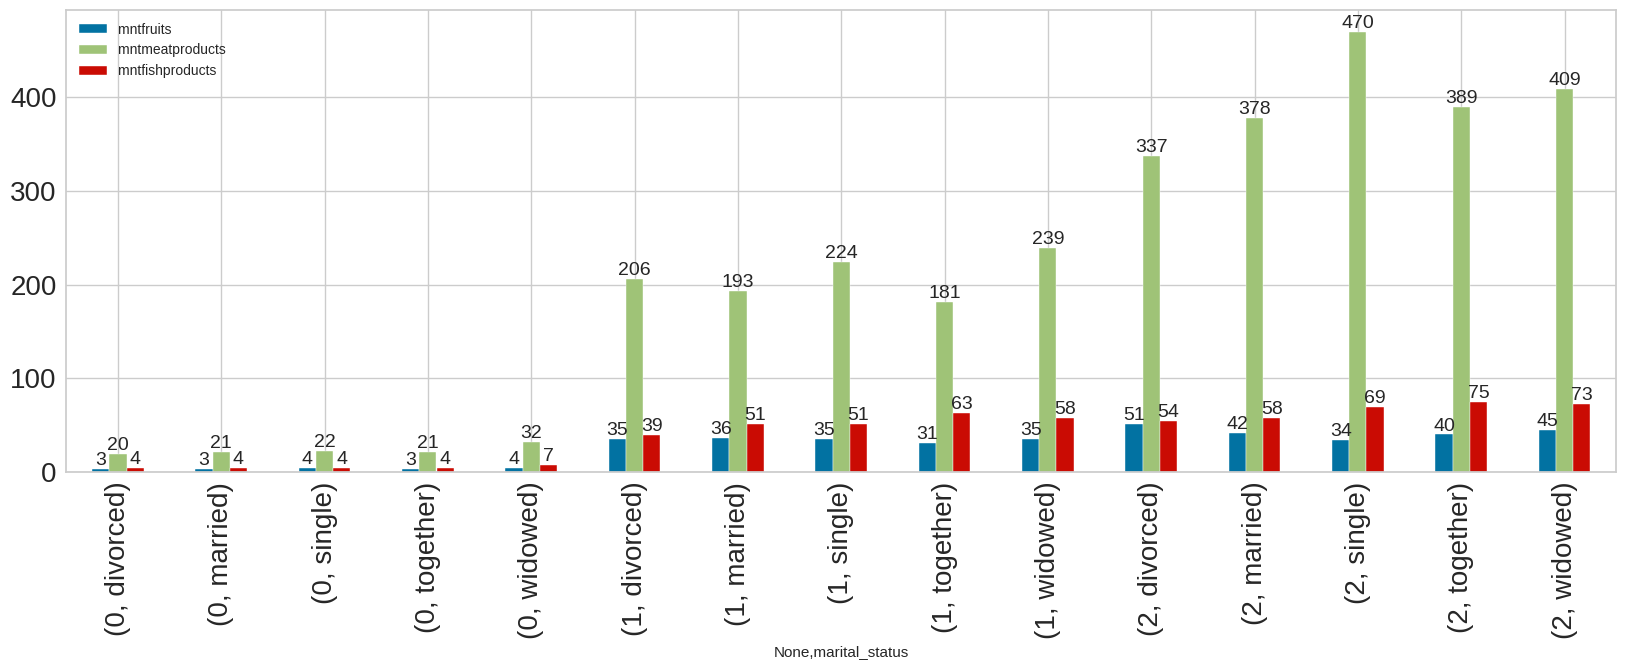

In [ ]:
ax = (
    df[["marital_status"]]
    .join(df.iloc[:, 8:11])
    .groupby([ final_model.labels_,"marital_status"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

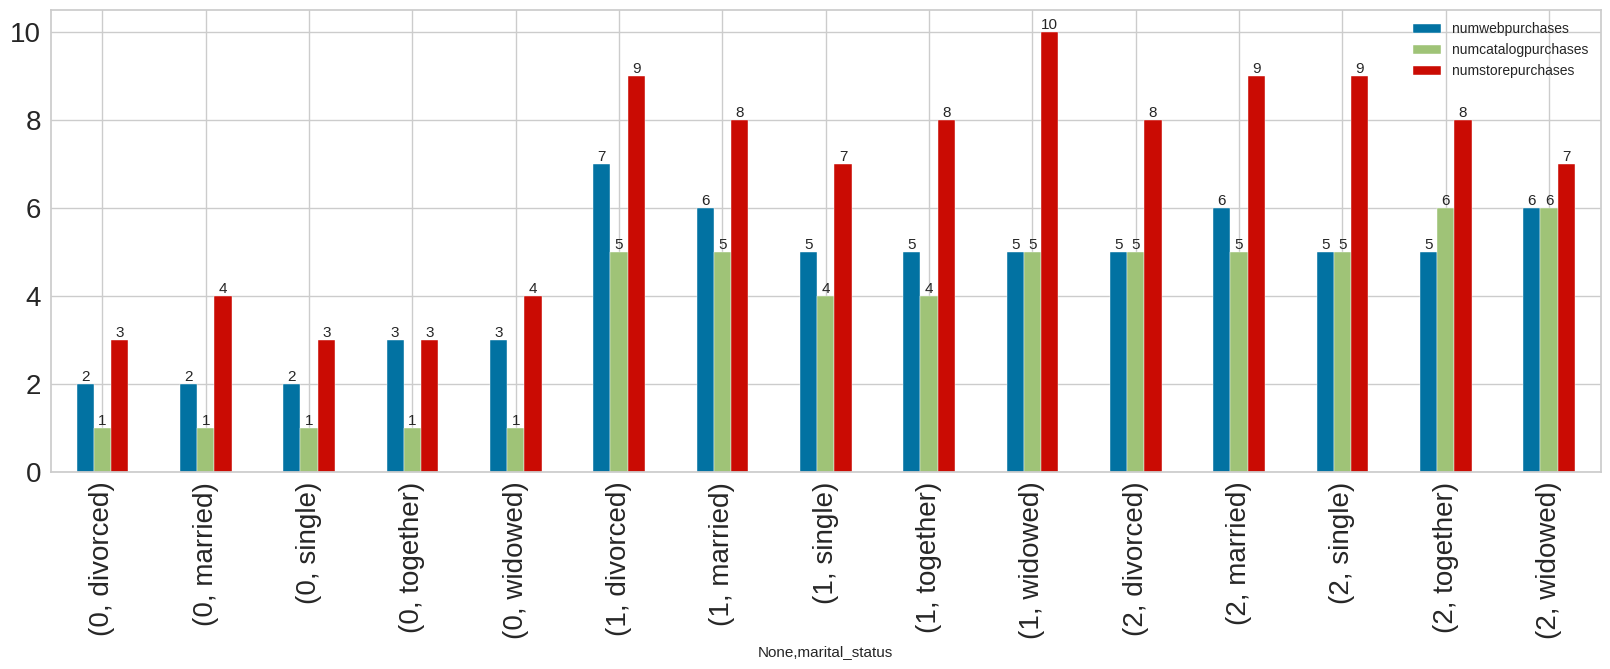

In [ ]:
ax = (
    df[["marital_status"]]
    .join(df1.iloc[:, 11:14])
    .groupby([ final_model.labels_,"marital_status",])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=11)

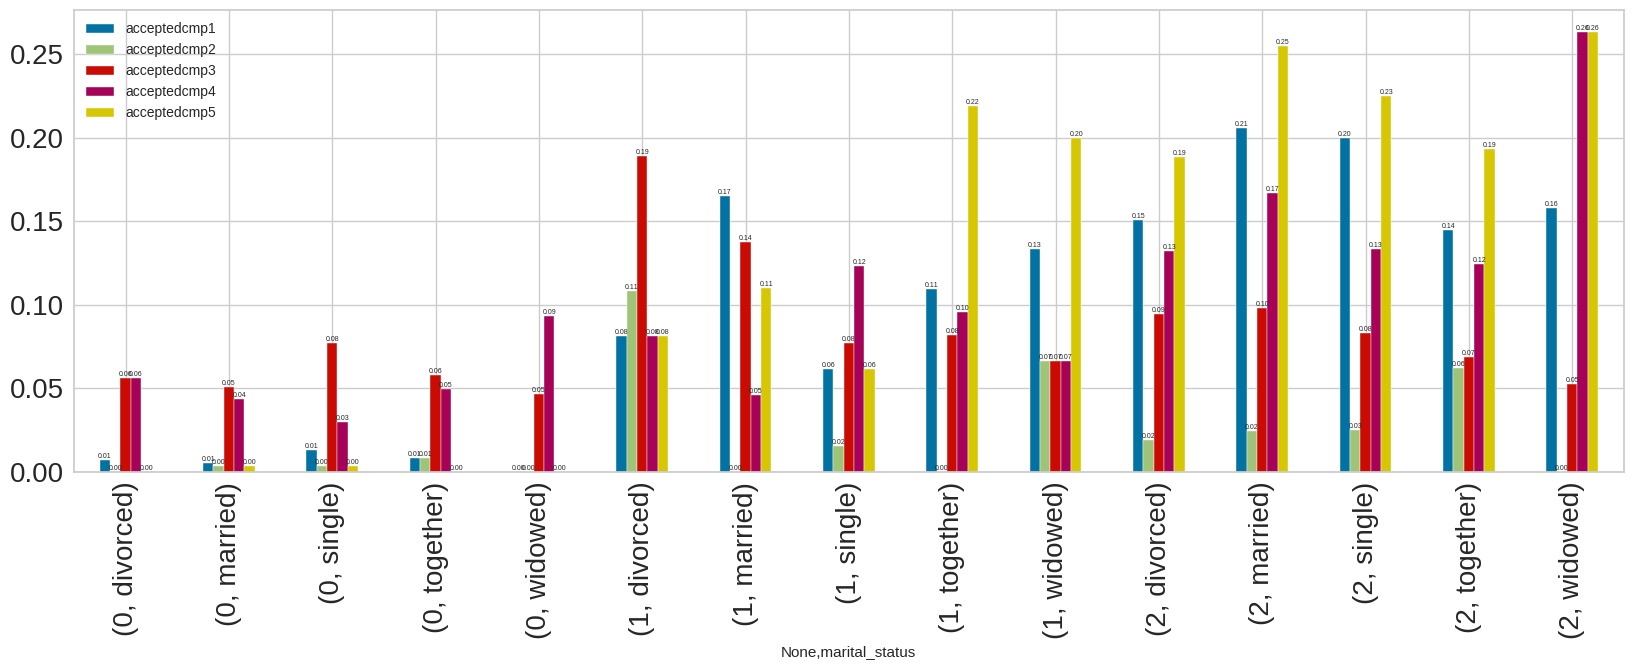

In [ ]:
ax = (
    df[
        [
            "marital_status",
            "acceptedcmp1",
            "acceptedcmp2",
            "acceptedcmp3",
            "acceptedcmp4",
            "acceptedcmp5",
        ]
    ]
    .groupby([final_model.labels_,"marital_status", ])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.2f", size=5)

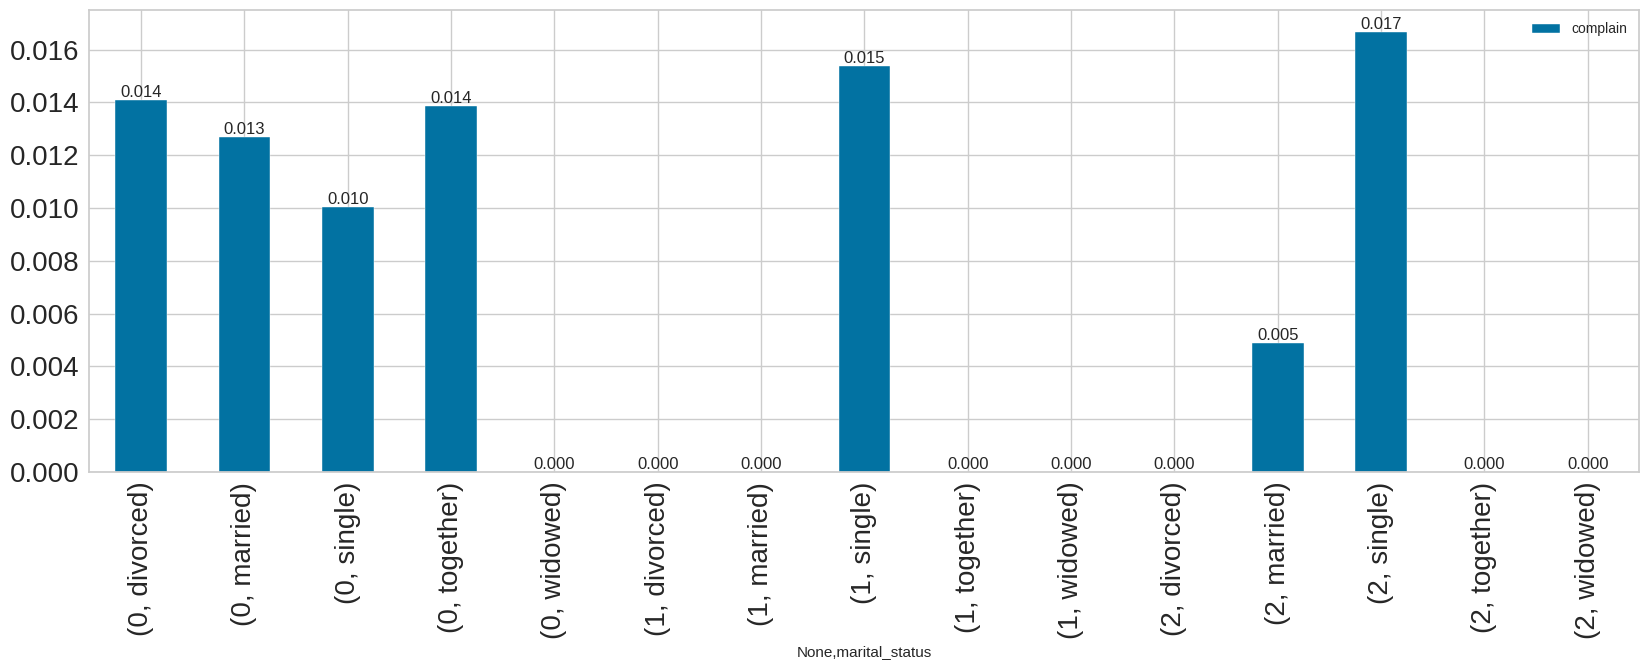

In [ ]:
ax = (
    df[
        [
            "marital_status",
            "complain",
        ]
    ]
    .groupby([final_model.labels_,"marital_status", ])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.3f", size=12)

#### We have made our inferences on the Kmeans algorithm so far, and we will take and compare the results with another clustering algorithm, Hierarchical Clustering:


### The point we need to pay attention to is the number of clusters in kmeans so that we can find the differences.

## Hierarchical Clustering

### Determine optimal number of clusters using Dendogram

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

### silhouette_score

In [ ]:
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df_selected)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_selected, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.38166886064502775
For n_clusters=3, the silhouette score is 0.35099073459114394
For n_clusters=4, the silhouette score is 0.3244665465217016
For n_clusters=5, the silhouette score is 0.23875974831304247
For n_clusters=6, the silhouette score is 0.24224721373564417
For n_clusters=7, the silhouette score is 0.24627306637068058
For n_clusters=8, the silhouette score is 0.24861233288359455
For n_clusters=9, the silhouette score is 0.23424947971163038
For n_clusters=10, the silhouette score is 0.23190962688594347


### Clustering based on selected features

In [ ]:
df_selected

,income,mntwines,mntmeatproducts,numcatalogpurchases,mntgoldprods,age
0,0,0.96,2.22,2,1.36,0.72
1,0,-0.34,-0.28,-0.25,-0.38,0.89
2,1,0.52,0.28,0,0.38,0.28
3,-1,-0.34,-0.22,-0.50,-0.40,-0.78
4,0,-0.00,0.24,0.25,-0.19,-0.61
...,...,...,...,...,...,...
2235,0,1.11,0.53,0.25,4.74,0.17
2236,0,0.48,-0.17,0,-0.34,1.33
2237,0,1.53,0.69,0.25,0,-0.61
2238,1,0.53,0.68,0.75,0.79,0.78


In [ ]:
Agg1 = AgglomerativeClustering(
    n_clusters=3,
    metric="euclidean",  # If linkage = "ward" then metric='euclidean' is required.
    linkage="ward",
)  # originating from the formulation of variance...
y_agg = Agg1.fit_predict(df_selected)

In [ ]:
df1["aglo_labels"] = y_agg

In [ ]:
df1.iloc[:, -2:]

,kmeans_labels,aglo_labels
0,1,0
1,0,1
2,2,0
3,0,1
4,2,1
...,...,...
2235,1,2
2236,2,1
2237,2,0
2238,2,0


In [ ]:
pd.crosstab(df1["kmeans_labels"], df1["aglo_labels"])

aglo_labels,0,1,2
kmeans_labels,,,
0,19,1013,1
1,357,16,198
2,337,215,83


**Hierarchical Clustrering for Educatin**



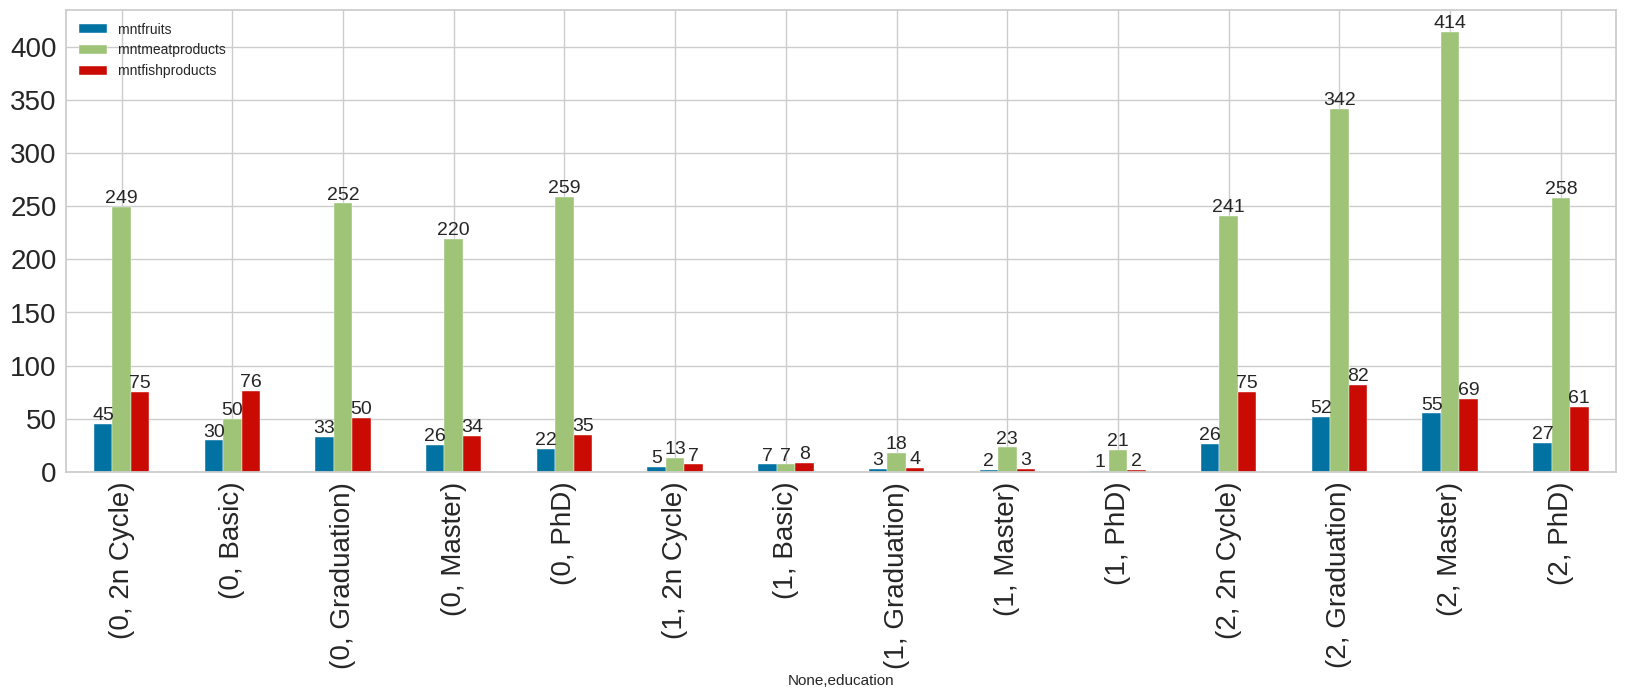

In [ ]:
ax = (
    df[["education"]]
    .join(df.iloc[:, 8:11])
    .groupby([Agg1.labels_,"education"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

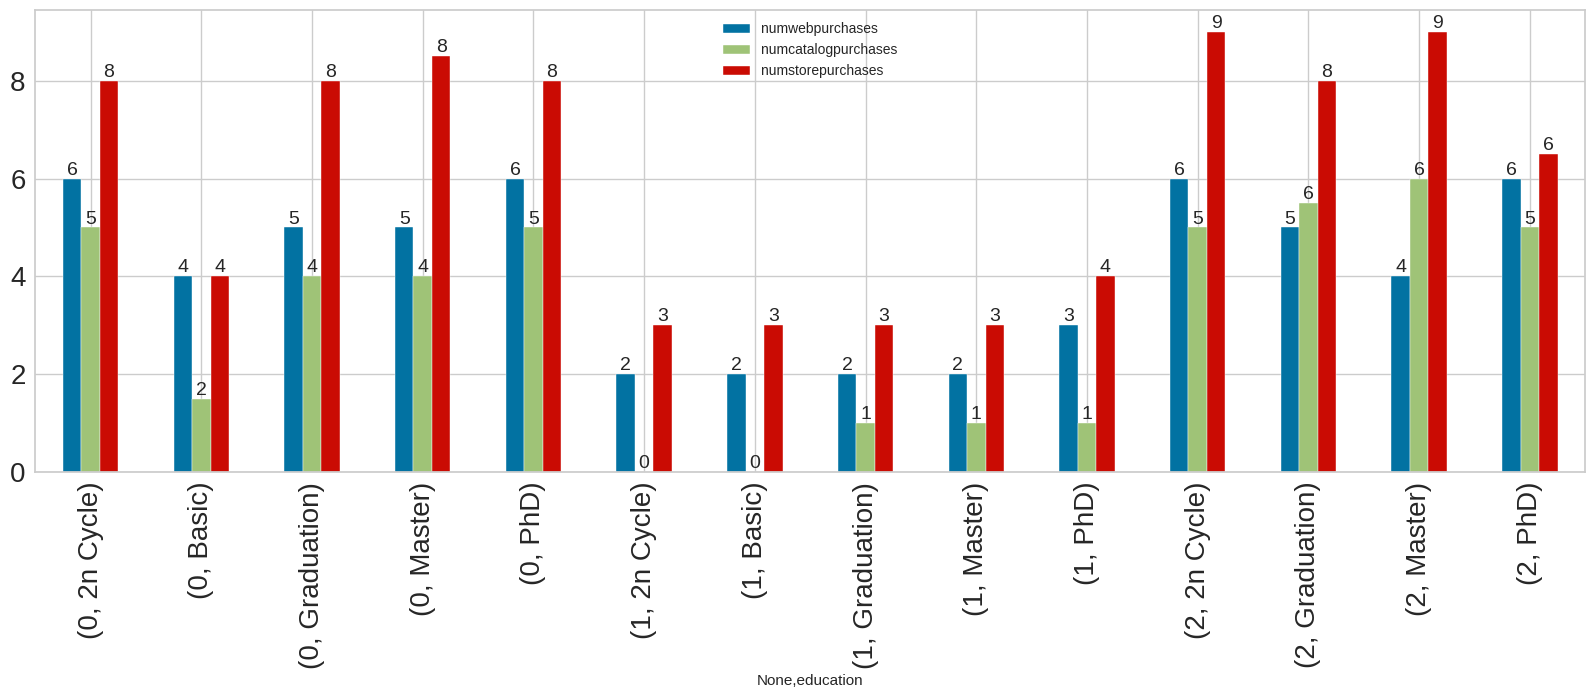

In [ ]:
ax = (
    df[["education"]]
    .join(df1.iloc[:, 11:14])
    .groupby([Agg1.labels_,"education"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

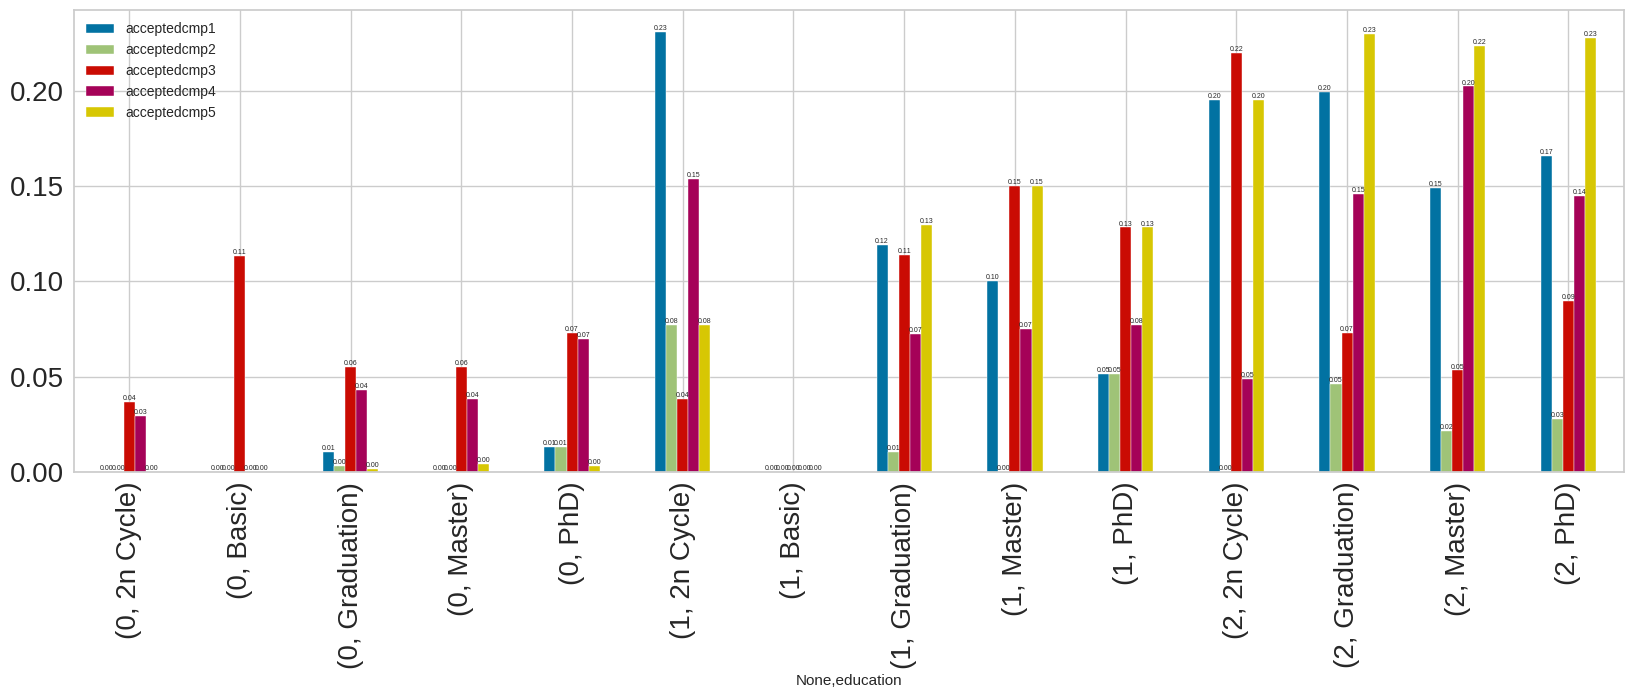

In [ ]:
ax = (
    df[
        [
            "education",
            "acceptedcmp1",
            "acceptedcmp2",
            "acceptedcmp3",
            "acceptedcmp4",
            "acceptedcmp5",
        ]
    ]
    .groupby([final_model.labels_,"education", ])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.2f", size=5)

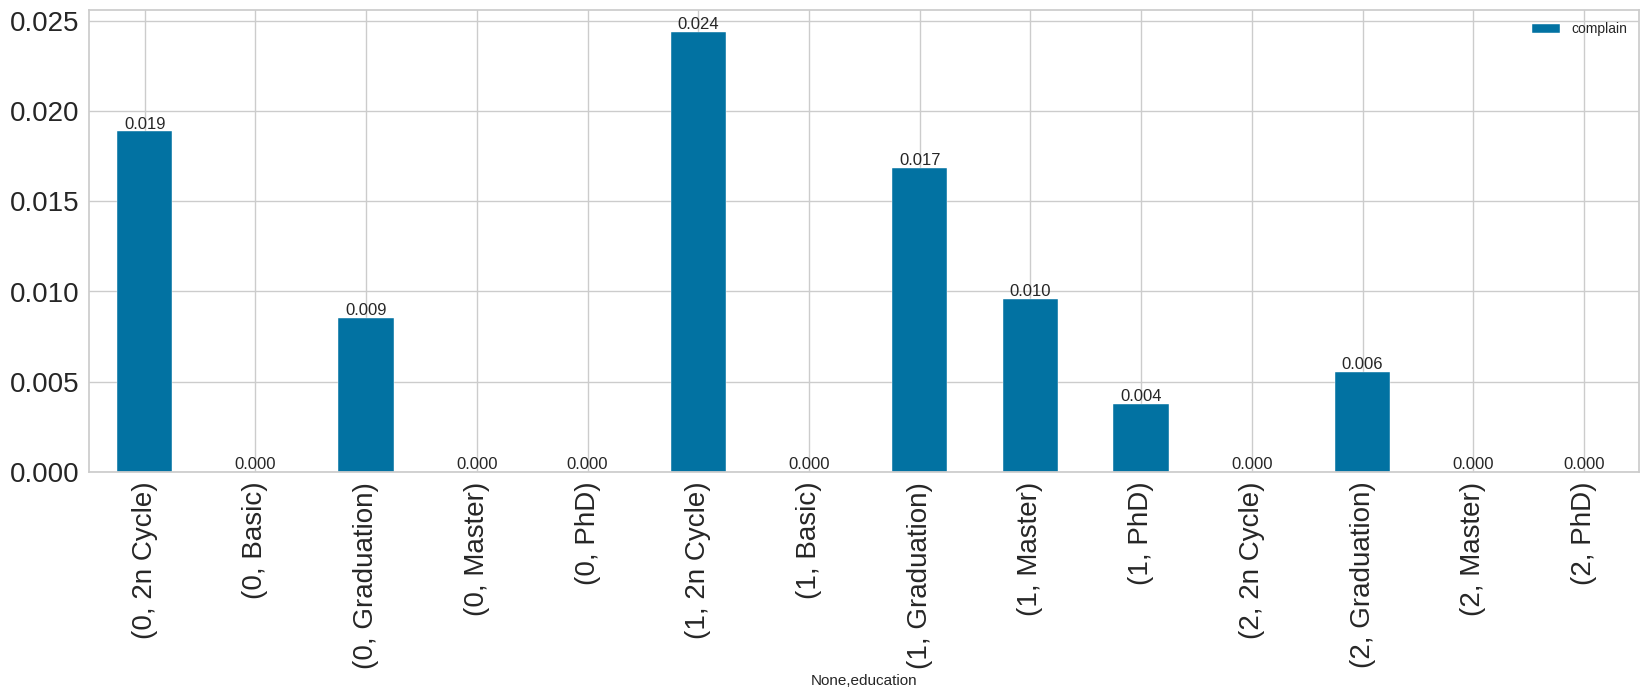

In [ ]:
ax = (
    df[
        [
            "education",
            "complain",
        ]
    ]
    .groupby([Agg1.labels_,"education", ])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.3f", size=12)

**Hierarchical Clustrering for Marital Status**

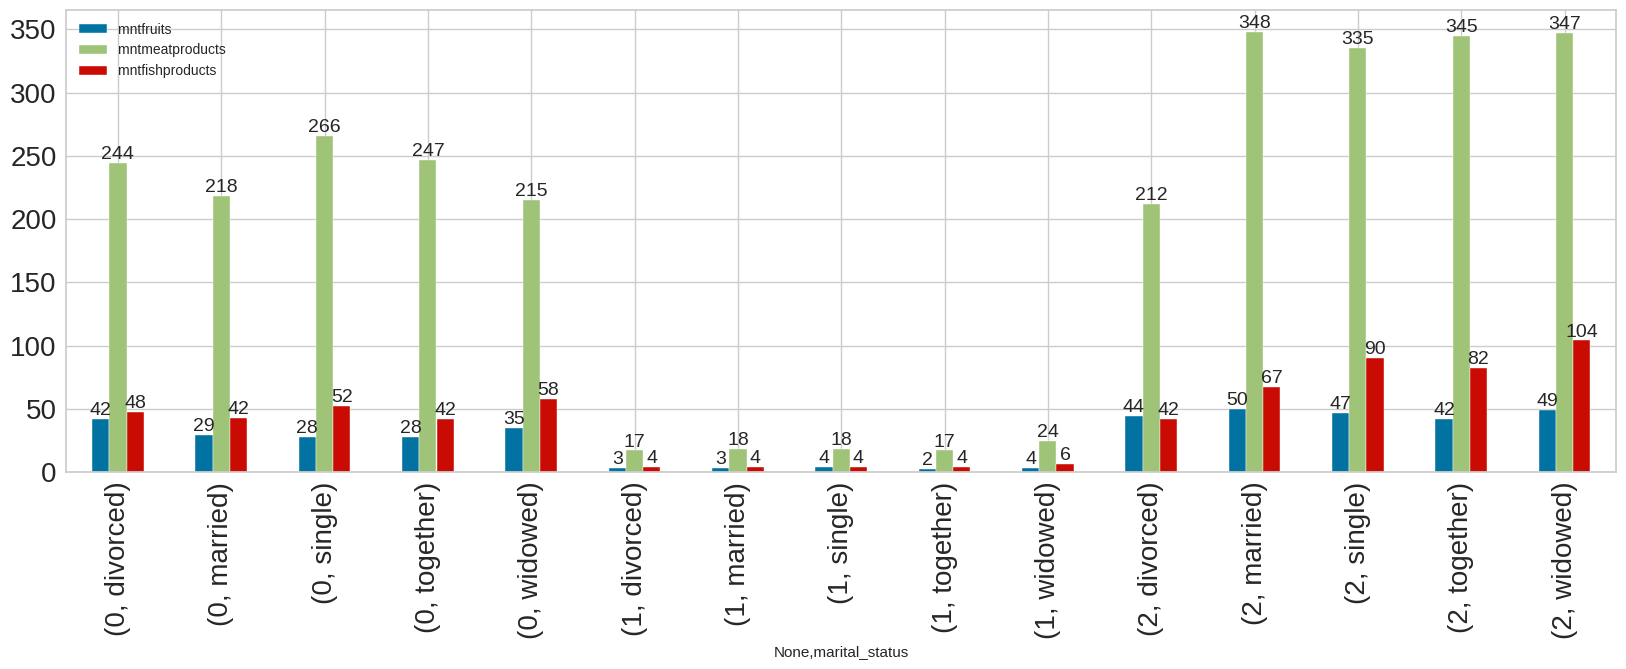

In [ ]:
ax = (
    df[["marital_status"]]
    .join(df.iloc[:, 8:11])
    .groupby([Agg1.labels_,"marital_status"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.f", size=14)

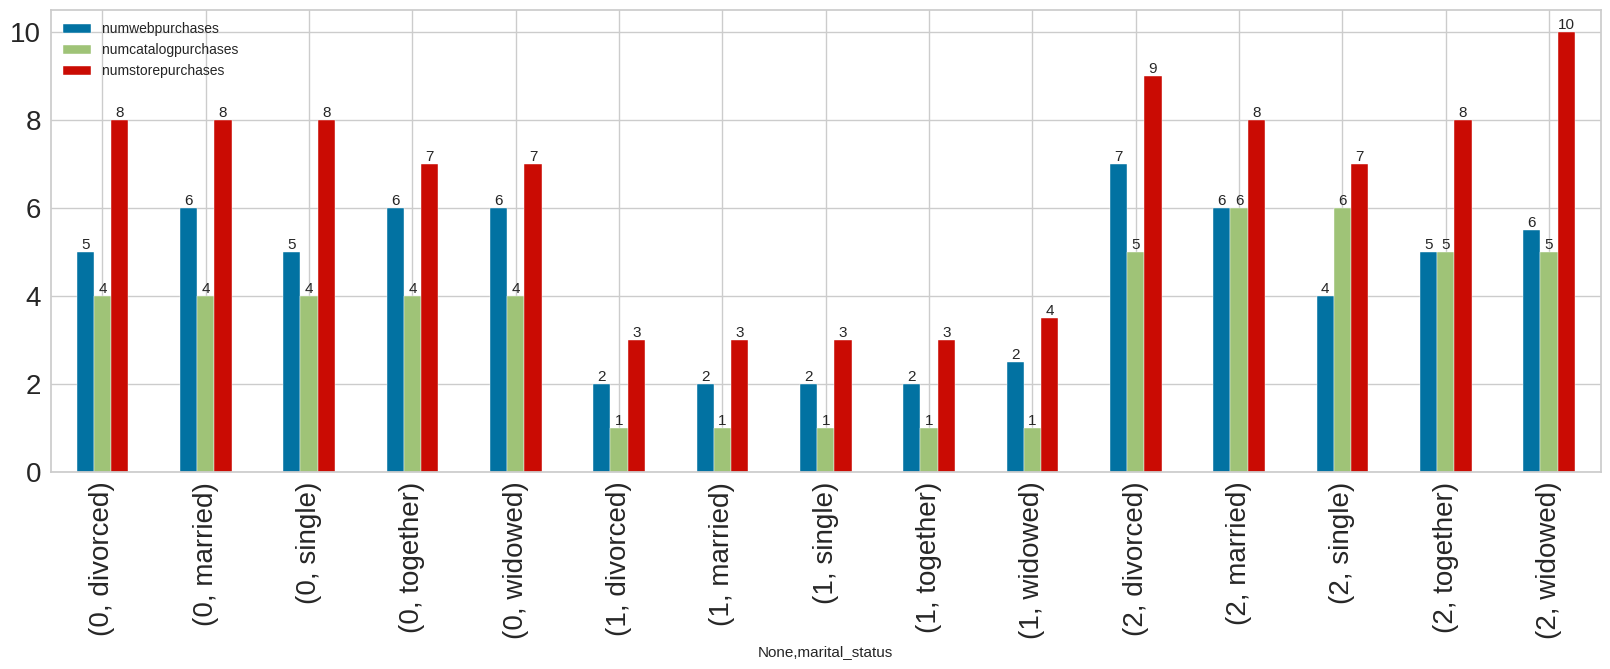

In [ ]:
ax = (
    df[["marital_status"]]
    .join(df1.iloc[:, 11:14])
    .groupby([ Agg1.labels_,"marital_status"])
    .median()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=11)

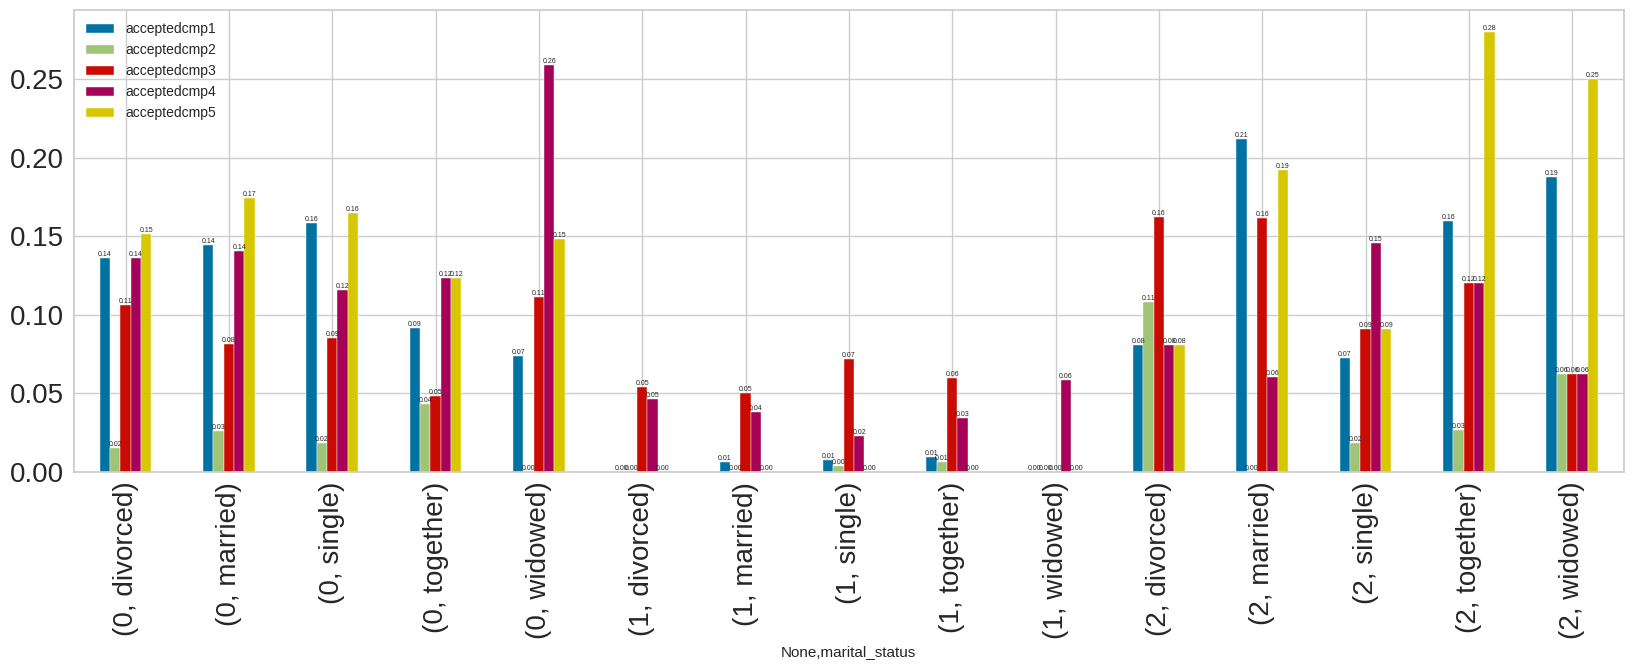

In [ ]:
ax = (
    df[
        [
            "marital_status",
            "acceptedcmp1",
            "acceptedcmp2",
            "acceptedcmp3",
            "acceptedcmp4",
            "acceptedcmp5",
        ]
    ]
    .groupby([ Agg1.labels_, "marital_status",])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.2f", size=5)

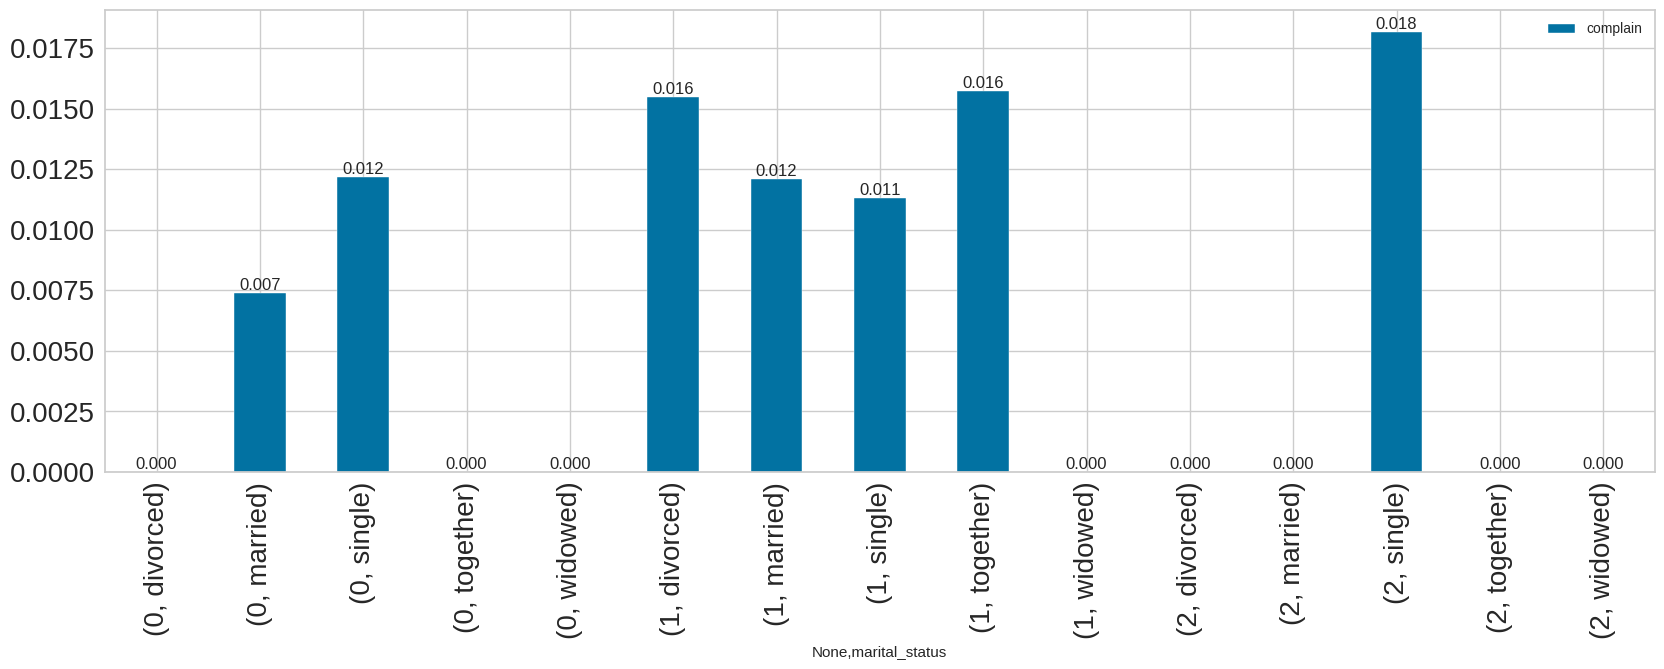

In [ ]:
ax = (
    df[
        [
            "marital_status",
            "complain",
        ]
    ]
    .groupby([Agg1.labels_,"marital_status", ])
    .mean()
    .plot(kind="bar", figsize=(20, 6), fontsize=20)
)
for p in ax.containers:
    ax.bar_label(p, fmt="%.3f", size=12)

## Conclusion